In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oSq21nk6YA7JS80deVrH")
project = rf.workspace("project-hv5yx").project("computer_vision-5nx0j")
version = project.version(1)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Computer_Vision-1 in yolov8-obb:: 100%|██████████| 9418/9418 [00:02<00:00, 4511.34it/s]


In [ ]:
import os

def update_first_number_to_zero(input_folder, output_folder):
    """
    Updates only the first number (class ID) in each line of YOLO label files to 0.

    Parameters:
        input_folder (str): Path to folder containing YOLO label files.
        output_folder (str): Path to save updated label files.
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".txt"):  # Process only .txt files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            with open(input_path, "r") as infile, open(output_path, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()  # Split line into components
                    if len(parts) > 0:
                        parts[0] = '0'  # Change the first number (class ID) to 0
                        new_line = " ".join(parts)  # Reassemble the line
                        outfile.write(new_line + "\n")  # Write updated line to output file

    print("First number (class IDs) updated to 0 and saved to:", output_folder)

# Example usage
input_folder = "Computer_Vision-1/valid/labelss"  # Replace with your input folder path
output_folder = "Computer_Vision-1/valid/labels"  # Replace with your output folder path
update_first_number_to_zero(input_folder, output_folder)


First number (class IDs) updated to 0 and saved to: Computer_Vision-1/valid/labels


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 43.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Step 1: Load the YOLOv8 model (you can choose different versions based on your needs)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano model, use 'yolov8s.pt', 'yolov8m.pt' etc. for other versions

# Step 2: Train the model
results = model.train(
    data='Computer_Vision-1/data.yaml',  # Updated path to data.yaml
    epochs=50,             # Set the number of epochs for training
    imgsz=640,             # Image size (typically 640x640)
    batch=16,              # Batch size (adjust based on your GPU memory)
    device=0,              # Use GPU (0 means first GPU, set to -1 if using CPU)
    workers=4,             # Number of workers for data loading (increase for faster loading)
    name='yolov8_training' # Name of the training run (saved in the "runs" folder)
)

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')  # Evaluate the test set if available



Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Computer_Vision-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolov8_training3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 118MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 289MB/s]


AMP: checks passed ✅


train: Scanning /content/Computer_Vision-1/train/labels... 4116 images, 9 backgrounds, 17 corrupt: 100%|██████████| 4116/4116 [00:02<00:00, 1395.57it/s]

train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.04a438b9f579f07f60f7dd4b3481d112.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0003      1.0316]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f12_kn_g3_8_jpg.rf.e61978f1b7d4584d8127a9c02b0a3a00.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0212]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.07ec0f358241c09a08e8ac9c50fefb8f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0684]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f13_kn_g3_7_jpg.rf.d470fc80c15e20b54f9250799d988d73.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.082]
train: WARNING ⚠️ /content/Computer_Vision-1/train/images/f14_kn_g3_2_jpg.rf.30b40e101e45d37fa09f2cee6db3933e.jpg: ignoring corrupt image/label: non-normalized or out of bounds

train: New cache created: /content/Computer_Vision-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Computer_Vision-1/valid/labels... 391 images, 0 backgrounds, 1 corrupt: 100%|██████████| 391/391 [00:00<00:00, 790.13it/s]

val: WARNING ⚠️ /content/Computer_Vision-1/valid/images/f5_kn_g3_3_jpg.rf.ed600f13893cd485ce07b10f71cf8cdf.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0294]
val: New cache created: /content/Computer_Vision-1/valid/labels.cache


Plotting labels to runs/detect/yolov8_training3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_training3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G       1.79      2.106      1.587          7        640: 100%|██████████| 257/257 [01:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]

                   all        390       1022      0.524      0.431      0.438      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G       1.75      1.724      1.561         21        640: 100%|██████████| 257/257 [01:33<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]


                   all        390       1022      0.637      0.478      0.547      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G       1.75      1.628      1.563         19        640: 100%|██████████| 257/257 [01:26<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]


                   all        390       1022      0.695      0.577       0.63      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.29G      1.737      1.583      1.557         13        640: 100%|██████████| 257/257 [01:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]


                   all        390       1022      0.737      0.547      0.613      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.674      1.503      1.521         15        640: 100%|██████████| 257/257 [01:30<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        390       1022      0.753      0.644      0.713      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G      1.667      1.462      1.507         15        640: 100%|██████████| 257/257 [01:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]

                   all        390       1022      0.766      0.637      0.705      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      1.633      1.405      1.476         21        640: 100%|██████████| 257/257 [01:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]


                   all        390       1022      0.759      0.664       0.73      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.29G      1.608      1.367      1.463         16        640: 100%|██████████| 257/257 [01:27<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]


                   all        390       1022      0.784      0.652      0.733      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.29G      1.585      1.318      1.448         11        640: 100%|██████████| 257/257 [01:29<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]


                   all        390       1022      0.782      0.687      0.749      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G      1.578      1.312      1.448         12        640: 100%|██████████| 257/257 [01:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

                   all        390       1022      0.794      0.655      0.733      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.19G      1.567       1.29      1.435         16        640: 100%|██████████| 257/257 [01:28<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        390       1022      0.816      0.689      0.767      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      1.547      1.281      1.424          9        640: 100%|██████████| 257/257 [01:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]

                   all        390       1022      0.795       0.71      0.779      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.21G      1.534      1.251      1.418         19        640: 100%|██████████| 257/257 [01:27<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.76it/s]

                   all        390       1022      0.818      0.694      0.772      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G      1.532      1.234      1.411         35        640: 100%|██████████| 257/257 [01:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        390       1022      0.812      0.696      0.795      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G       1.52      1.213      1.405         15        640: 100%|██████████| 257/257 [01:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        390       1022      0.828      0.659      0.758      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G      1.515      1.198      1.394         12        640: 100%|██████████| 257/257 [01:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        390       1022      0.825      0.722      0.784      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G      1.499      1.165      1.389         14        640: 100%|██████████| 257/257 [01:28<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.72it/s]

                   all        390       1022      0.797      0.692      0.774      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.22G      1.488      1.166       1.38         14        640: 100%|██████████| 257/257 [01:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]

                   all        390       1022      0.813      0.707      0.778       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.19G      1.479      1.154      1.379          6        640: 100%|██████████| 257/257 [01:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]

                   all        390       1022      0.849      0.705      0.794      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G      1.466      1.137      1.366         15        640: 100%|██████████| 257/257 [01:28<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]

                   all        390       1022      0.879      0.697      0.799      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G      1.457      1.115      1.355          5        640: 100%|██████████| 257/257 [01:30<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]

                   all        390       1022      0.818      0.685      0.764      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.21G      1.455      1.109      1.361          4        640: 100%|██████████| 257/257 [01:28<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.75it/s]

                   all        390       1022      0.809      0.735      0.796      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.21G      1.464      1.108      1.362         13        640: 100%|██████████| 257/257 [01:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        390       1022       0.83      0.714      0.785      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G      1.449      1.097      1.354         15        640: 100%|██████████| 257/257 [01:29<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.83it/s]

                   all        390       1022      0.817      0.732      0.801      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G       1.44       1.08      1.344         25        640: 100%|██████████| 257/257 [01:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]


                   all        390       1022      0.856      0.715      0.799      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.21G      1.427      1.067      1.344          6        640: 100%|██████████| 257/257 [01:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        390       1022      0.839       0.72      0.805       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.21G      1.437      1.064      1.344          4        640: 100%|██████████| 257/257 [01:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]


                   all        390       1022      0.845      0.732      0.799      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.21G      1.421      1.054      1.334         12        640: 100%|██████████| 257/257 [01:29<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        390       1022      0.869      0.713      0.811      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G      1.406       1.02      1.327         15        640: 100%|██████████| 257/257 [01:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        390       1022       0.84      0.733      0.812      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.21G      1.401      1.019      1.327         10        640: 100%|██████████| 257/257 [01:30<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]

                   all        390       1022      0.877      0.723      0.814      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G      1.392      1.006      1.319          9        640: 100%|██████████| 257/257 [01:26<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]

                   all        390       1022      0.863      0.706      0.802      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.2G       1.39     0.9993      1.313          8        640: 100%|██████████| 257/257 [01:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        390       1022       0.85      0.709      0.802      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.22G      1.381     0.9879      1.311         19        640: 100%|██████████| 257/257 [01:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]

                   all        390       1022      0.859      0.729      0.806      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.29G      1.379     0.9905      1.307          8        640: 100%|██████████| 257/257 [01:26<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]


                   all        390       1022      0.831      0.741      0.809      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.21G      1.372     0.9768      1.307         14        640: 100%|██████████| 257/257 [01:27<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        390       1022      0.839      0.737      0.791      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.19G      1.364     0.9692      1.298         22        640: 100%|██████████| 257/257 [01:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]


                   all        390       1022      0.861      0.718        0.8      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.21G      1.358     0.9611      1.297         13        640: 100%|██████████| 257/257 [01:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        390       1022      0.844      0.742      0.802      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.22G      1.344     0.9481      1.287         21        640: 100%|██████████| 257/257 [01:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        390       1022      0.859      0.732      0.803      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.2G      1.336     0.9277      1.279         27        640: 100%|██████████| 257/257 [01:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]

                   all        390       1022      0.864      0.738      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G      1.351     0.9315      1.285         14        640: 100%|██████████| 257/257 [01:29<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]

                   all        390       1022      0.878      0.714      0.803      0.528


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.19G      1.244     0.7395      1.222         13        640: 100%|██████████| 257/257 [01:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        390       1022      0.858      0.745      0.801      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G      1.239     0.7351      1.215         12        640: 100%|██████████| 257/257 [01:19<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        390       1022      0.843      0.748      0.803      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.17G      1.218     0.7134      1.207         16        640: 100%|██████████| 257/257 [01:22<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        390       1022      0.856       0.75      0.806      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.16G      1.198     0.6984      1.197          8        640: 100%|██████████| 257/257 [01:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]

                   all        390       1022      0.856      0.739      0.808      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G       1.19     0.6938      1.191         15        640: 100%|██████████| 257/257 [01:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        390       1022      0.874      0.731      0.811       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G      1.185     0.6767      1.193         10        640: 100%|██████████| 257/257 [01:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        390       1022      0.885      0.732      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.19G      1.172     0.6727       1.18          4        640: 100%|██████████| 257/257 [01:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]

                   all        390       1022      0.881      0.736      0.815      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.171     0.6653       1.18          5        640: 100%|██████████| 257/257 [01:17<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]

                   all        390       1022      0.886      0.729      0.807      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.19G      1.153     0.6549      1.171          7        640: 100%|██████████| 257/257 [01:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]


                   all        390       1022      0.878      0.737       0.81      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G      1.154     0.6503      1.164         10        640: 100%|██████████| 257/257 [01:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]


                   all        390       1022      0.874      0.736      0.811      0.534

50 epochs completed in 1.277 hours.
Optimizer stripped from runs/detect/yolov8_training3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_training3/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_training3/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.47it/s]


                   all        390       1022      0.878      0.736      0.815      0.536
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8_training3
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Computer_Vision-1/test/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 1734.18it/s]

val: New cache created: /content/Computer_Vision-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        196        489      0.877      0.744      0.811      0.521
Speed: 0.6ms preprocess, 5.6ms inference, 0.2ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov8_training32


AttributeError: 'DetMetrics' object has no attribute 'get'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Computer_Vision-1/test/labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]


                   all        196        489      0.877      0.744      0.811      0.521
Speed: 0.8ms preprocess, 5.3ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/yolov8_training36
Model Evaluation Metrics:
Precision: 0.5211
Recall: 0.5211
mAP@0.5: 0.8106
mAP@0.5:0.95: 0.5211
Average IoU: 0.8106


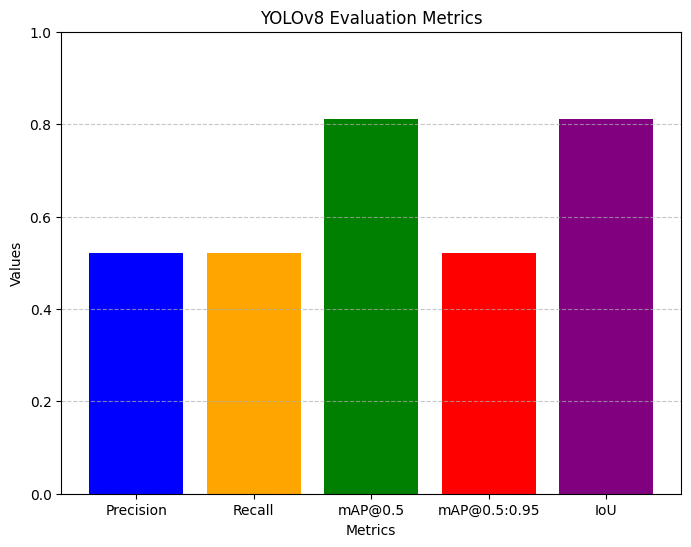

In [ ]:
from matplotlib import pyplot as plt

# Step 3: Evaluate the model on the test set
metrics = model.val(data='Computer_Vision-1/data.yaml', split='test')  # Evaluate the test set if available
if metrics:
    # Access metrics through the 'box' attribute
    precision = metrics.box.maps[0]  # Precision (mAP@0.5) for class 0
    recall = metrics.box.maps[0]    # Recall (mAP@0.5) for class 0
    map50 = metrics.box.map50       # Access map50 directly
    map_5095 = metrics.box.map       # Access map_5095 (mAP@0.5:0.95) directly
    # iou = metrics.box.maps[0.5]  # Access IoU (mAP@0.5) - This line caused the error
    iou = metrics.box.map50 # IoU is usually represented by mAP@0.5 in YOLOv8

    # Print metrics
    print("Model Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"mAP@0.5: {map50:.4f}")
    print(f"mAP@0.5:0.95: {map_5095:.4f}")
    print(f"Average IoU: {iou:.4f}")

    # ... (rest of your code)

    # Step 4: Plot the metrics
    metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95', 'IoU']
    metric_values = [precision, recall, map50, map_5095, iou]

    plt.figure(figsize=(8, 6))
    plt.bar(metric_names, metric_values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.ylim(0, 1)  # Metrics are between 0 and 1
    plt.title('YOLOv8 Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No evaluation metrics available.")


image 1/1 /content/sample_data/a.jpg: 640x416 5 KhSTs, 36.1ms
Speed: 5.2ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


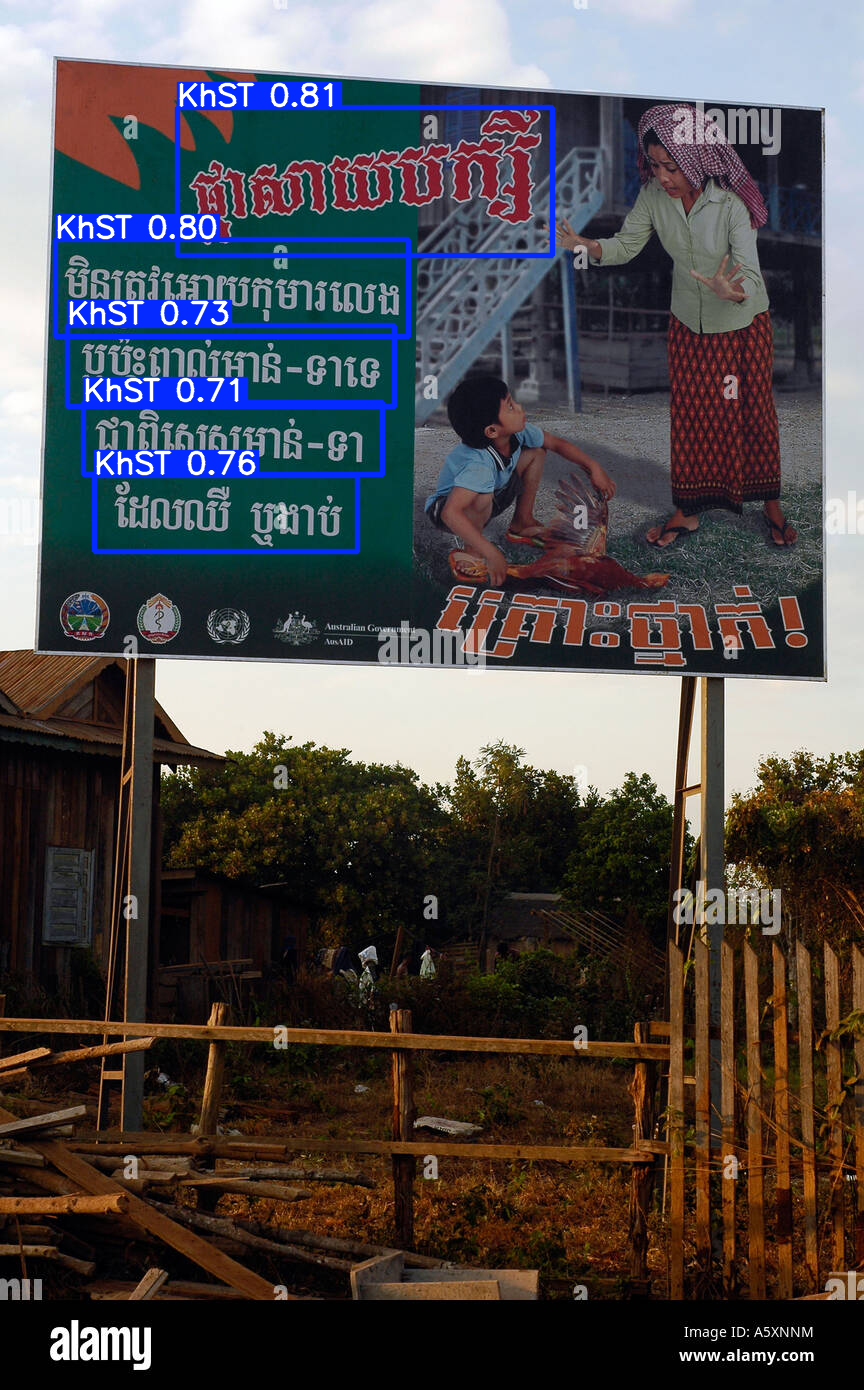

In [ ]:
# Run inference on an image
results = model.predict('/content/sample_data/a.jpg')  # Input image path
# Assuming 'results' is a list, access the first element to call 'show()'
results[0].show()  # Show results with bounding boxes and class labels